In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\(9)_Temperature\temperature.csv')

# Data Understanding

In [ ]:
pd.set_option("display.max_columns", None)
df.head() #Looking into the top 5 rows of the dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Column Information:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [ ]:
df.shape #Cecking the shape of the dataset

(7752, 25)

In [ ]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We see that most data are float type with only one object type, that too being date. We shall treat it in the EDA

In [ ]:
df.describe() #Statistical information of the dataset

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Except for the null values, the data seems proper

In [ ]:
df.columns #Calling all the column names of the dataset

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Treating Null Values

In [ ]:
df.isnull().sum() #Checking for null values

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Since we have more than 7000 rows of data, let us just drop the rows with null values and check the percentage loss of data

In [ ]:
df_new = df.dropna()

In [ ]:
print('Percentage loss of data:\t', (((df.shape[0]-df_new.shape[0])/df.shape[0])*100), '%')

Percentage loss of data:	 2.1155830753353975 %


There has been only 2% loss of data while treating null values. Let us use visualization to check for any null values

<AxesSubplot:>

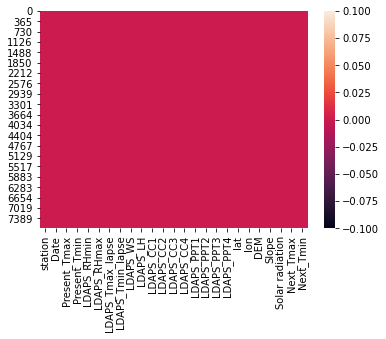

In [ ]:
df = df_new #Overwriting the new dataframe over the old one
sns.heatmap(df.isnull()) #Visualization of null values

We see that there are no null values

# Exploratory Data Analysis

Let us now look into all the columns one at a time, beginning with the target column 'Next_Tmax' and 'Next_Tmin'

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

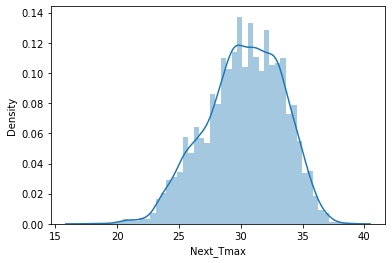

In [ ]:
#Density plot
sns.distplot(df['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmax'>

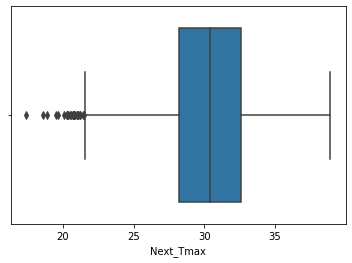

In [ ]:
#Box plot
sns.boxplot(df['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

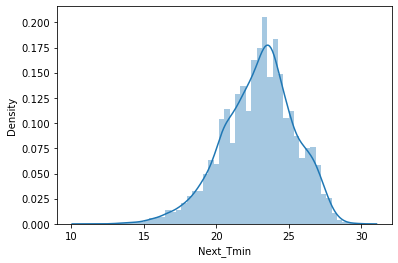

In [ ]:
#Density plot
sns.distplot(df['Next_Tmin'])

<AxesSubplot:xlabel='Next_Tmin'>

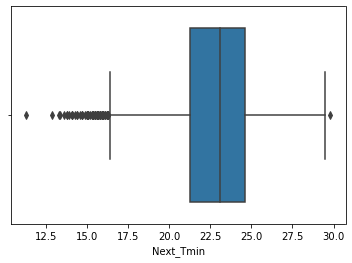

In [ ]:
#Box plot
sns.boxplot(df['Next_Tmin'])

The next column we look into is the 'station'.

<AxesSubplot:xlabel='station'>

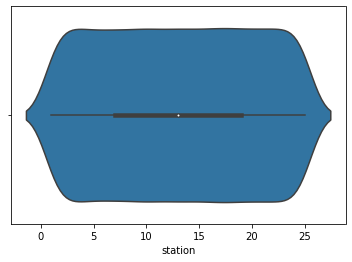

In [ ]:
#Violin plot
sns.violinplot(df['station'])

The next column we look into is the 'Date'. It is object type, so we create three different columns for Day, Month and Year

In [ ]:
df['Day'] = pd.to_datetime(df['Date']).dt.day #Taking the day
df['Month'] = pd.to_datetime(df['Date']).dt.month #Taking month
df['Year'] = pd.to_datetime(df['Date']).dt.year #Taking year

Now that we have split, let us drop the column 'Date' itself

In [ ]:
df.drop(columns='Date', inplace=True) #Dropping the column

The next column we look into is the 'Present_Tmax'.

<AxesSubplot:xlabel='Present_Tmax'>

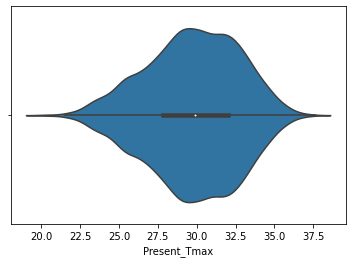

In [ ]:
#Violin plot
sns.violinplot(df['Present_Tmax'])

The next column we look into is the 'Present_Tmin'.

<AxesSubplot:xlabel='Present_Tmin'>

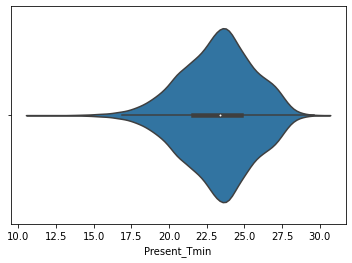

In [ ]:
#Violin plot
sns.violinplot(df['Present_Tmin'])

The next column we look into is the 'LDAPS_RHmin'.

<AxesSubplot:xlabel='LDAPS_RHmin'>

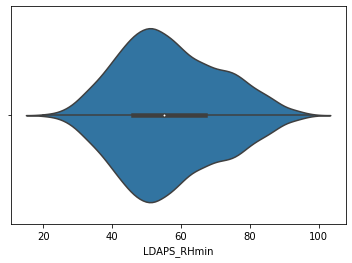

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_RHmin'])

The next column we look into is the 'LDAPS_RHmax'.

<AxesSubplot:xlabel='LDAPS_RHmax'>

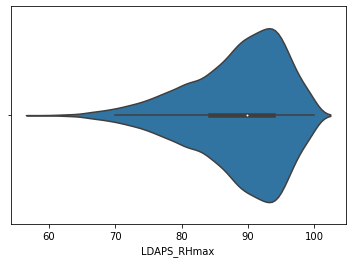

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_RHmax'])

The next column we look into is the 'LDAPS_Tmax_lapse'.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

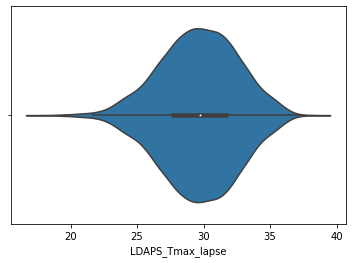

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_Tmax_lapse'])

The next column we look into is the 'LDAPS_Tmin_lapse'.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

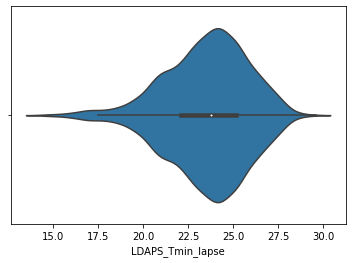

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_Tmin_lapse'])

The next column we look into is the 'LDAPS_WS'.

<AxesSubplot:xlabel='LDAPS_WS'>

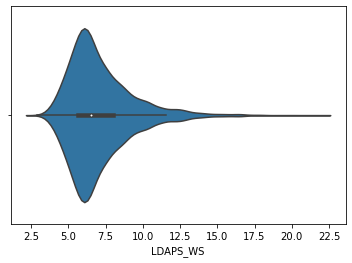

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_WS'])

The next column we look into is the 'LDAPS_LH'.

<AxesSubplot:xlabel='LDAPS_LH'>

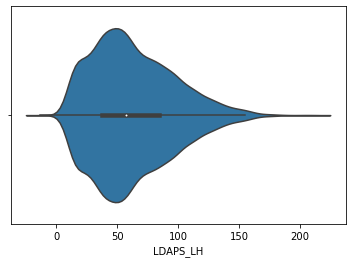

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_LH'])

The next column we look into is the 'LDAPS_CC1'.

<AxesSubplot:xlabel='LDAPS_CC1'>

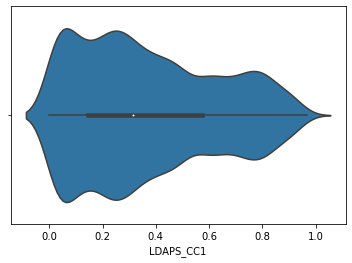

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_CC1'])

The next column we look into is the 'LDAPS_CC2'.

<AxesSubplot:xlabel='LDAPS_CC2'>

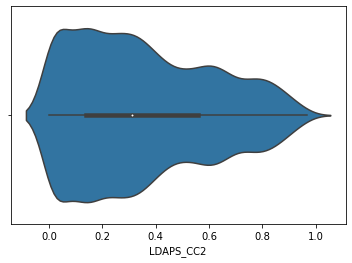

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_CC2'])

The next column we look into is the 'LDAPS_CC3'.

<AxesSubplot:xlabel='LDAPS_CC3'>

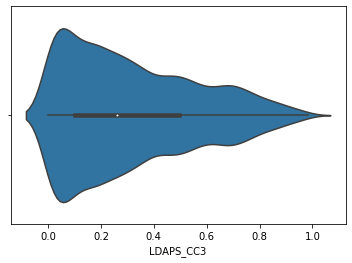

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_CC3'])

The next column we look into is the 'LDAPS_CC4'.

<AxesSubplot:xlabel='LDAPS_CC4'>

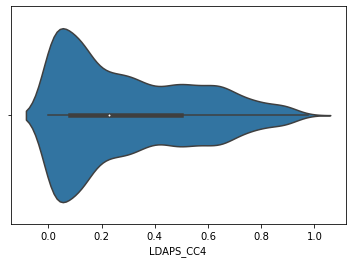

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_CC4'])

The next column we look into is the 'LDAPS_PPT1'.

<AxesSubplot:xlabel='LDAPS_PPT1'>

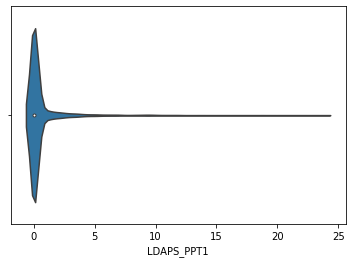

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_PPT1'])

The next column we look into is the 'LDAPS_PPT2'.

<AxesSubplot:xlabel='LDAPS_PPT2'>

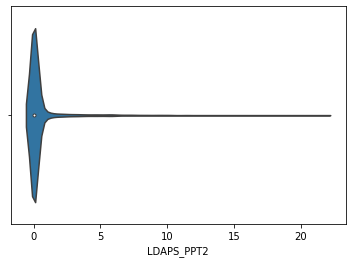

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_PPT2'])

The next column we look into is the 'LDAPS_PPT3'.

<AxesSubplot:xlabel='LDAPS_PPT3'>

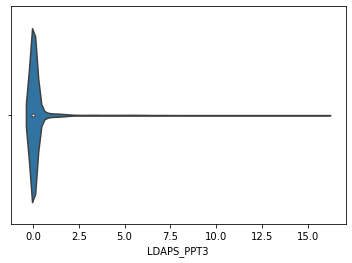

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_PPT3'])

The next column we look into is the 'LDAPS_PPT4'.

<AxesSubplot:xlabel='LDAPS_PPT4'>

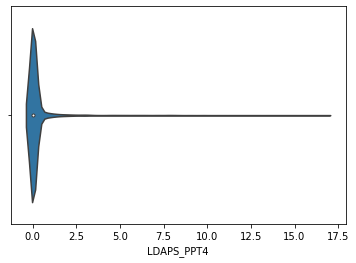

In [ ]:
#Violin plot
sns.violinplot(df['LDAPS_PPT4'])

The next column we look into is the 'lat'.

<AxesSubplot:xlabel='lat'>

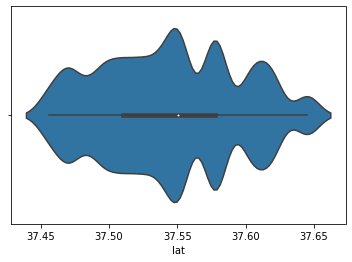

In [ ]:
#Violin plot
sns.violinplot(df['lat'])

The next column we look into is the 'lon'.

<AxesSubplot:xlabel='lon'>

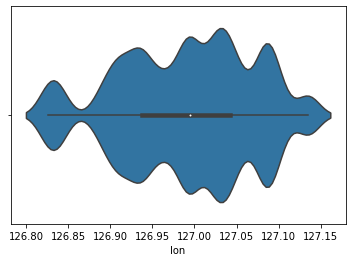

In [ ]:
#Violin plot
sns.violinplot(df['lon'])

The next column we look into is the 'DEM'.

<AxesSubplot:xlabel='DEM'>

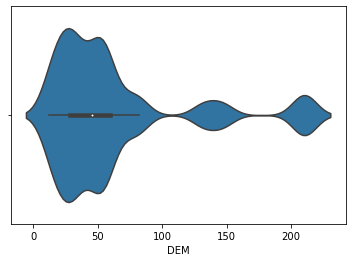

In [ ]:
#Violin plot
sns.violinplot(df['DEM'])

The next column we look into is the 'Slope'.

<AxesSubplot:xlabel='Slope'>

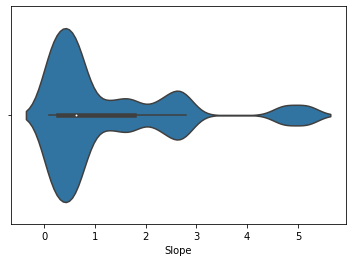

In [ ]:
#Violin plot
sns.violinplot(df['Slope'])

The next column we look into is the 'Solar radiation'.

<AxesSubplot:xlabel='Solar radiation'>

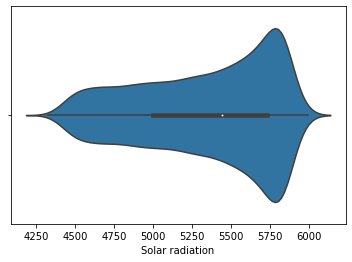

In [ ]:
#Violin plot
sns.violinplot(df['Solar radiation'])

From the above visualization we note that the data is coplete and all numerical with a lot of skewness and outliers present. Hence, we shall treat for the same.

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,0.003526,-0.000161,0.005005,-0.001954,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,-0.542728,-0.429739,-0.115659,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,-0.044998,-0.079536,0.034956,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,0.238155,0.218870,0.141503,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.028312,-0.082267,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,-0.246709,-0.173156,-0.018708,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


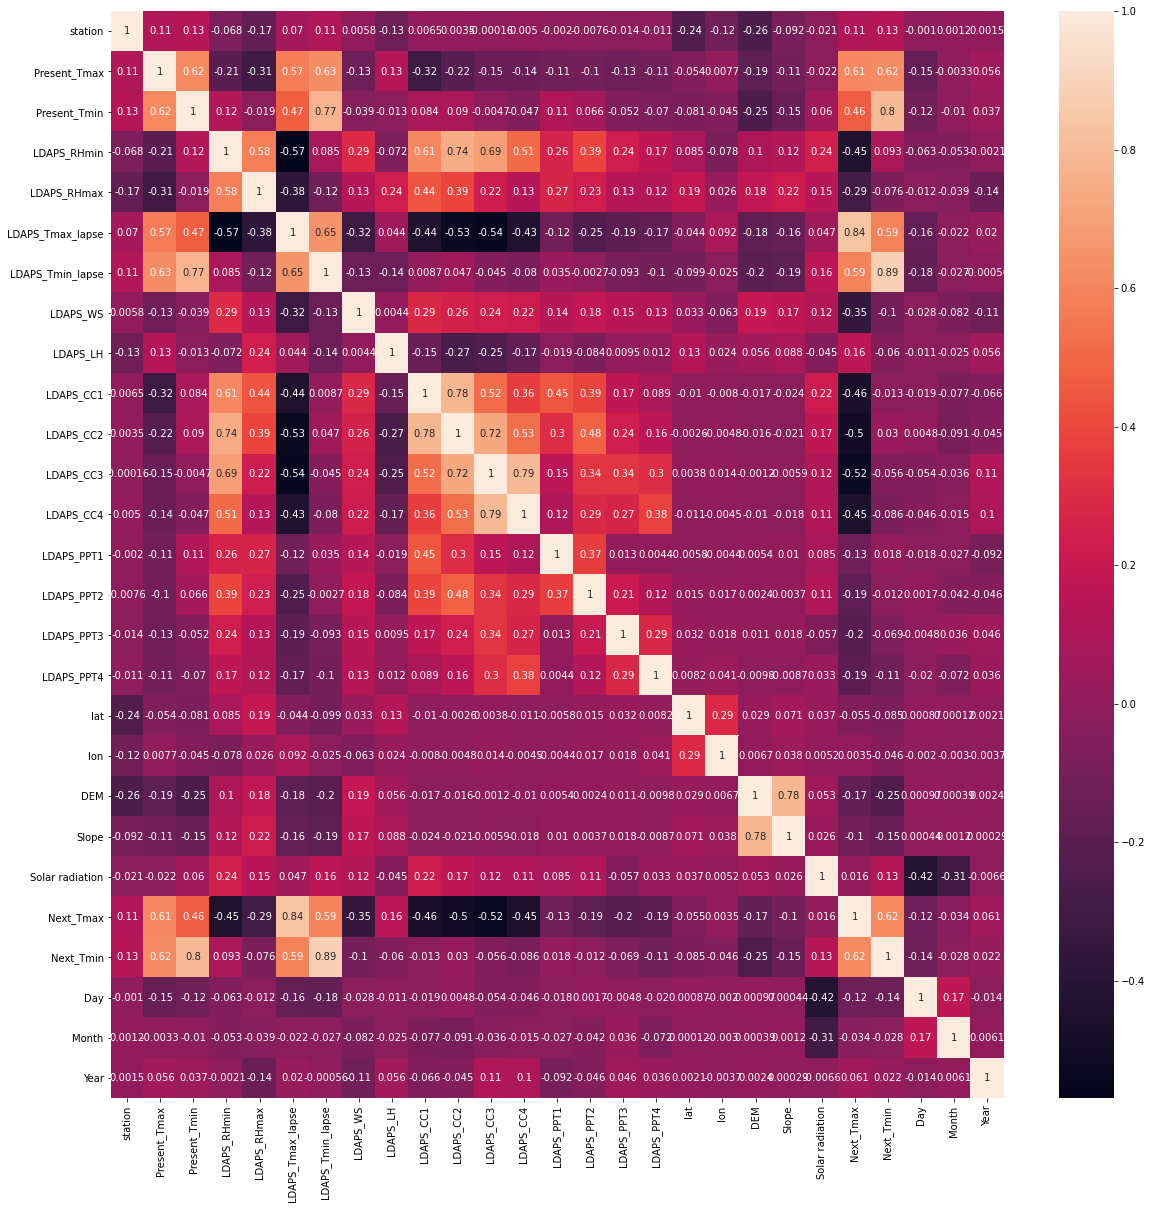

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Correlation wrt target column 'Next_Tmax'
df.corr()['Next_Tmax'].sort_values()

LDAPS_CC3          -0.523061
LDAPS_CC2          -0.498295
LDAPS_CC1          -0.459705
LDAPS_CC4          -0.454039
LDAPS_RHmin        -0.446824
LDAPS_WS           -0.351107
LDAPS_RHmax        -0.289788
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
LDAPS_PPT2         -0.186722
DEM                -0.174578
LDAPS_PPT1         -0.125954
Day                -0.122303
Slope              -0.104279
lat                -0.055367
Month              -0.033684
lon                 0.003502
Solar radiation     0.016145
Year                0.061211
station             0.107747
LDAPS_LH            0.156779
Present_Tmin        0.463523
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

The correlation looks proper with 'LDAPS_Tmax_lapse' having the maximum correlation

In [ ]:
#Correlation wrt target column 'Next_Tmin'
df.corr()['Next_Tmin'].sort_values()

DEM                -0.249303
Slope              -0.148379
Day                -0.135865
LDAPS_PPT4         -0.114900
LDAPS_WS           -0.102021
LDAPS_CC4          -0.086197
lat                -0.085136
LDAPS_RHmax        -0.076415
LDAPS_PPT3         -0.068664
LDAPS_LH           -0.060392
LDAPS_CC3          -0.056490
lon                -0.045758
Month              -0.028344
LDAPS_CC1          -0.012877
LDAPS_PPT2         -0.012462
LDAPS_PPT1          0.018031
Year                0.021617
LDAPS_CC2           0.030358
LDAPS_RHmin         0.093249
Solar radiation     0.125517
station             0.128184
LDAPS_Tmax_lapse    0.589963
Next_Tmax           0.616629
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_Tmin_lapse    0.886513
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

The correlation looks proper with 'LDAPS_Tmin_lapse' having the maximum correlation

# Outliers

We use the zscore method to remove the outliers with a threshold of 3

In [ ]:
z = np.abs(zscore(df)) #Calculation zscore
df_new = df[(z<3).all(axis=1)] #Removing outliers based on zscore threshold

In [ ]:
df_new.shape

(6739, 27)

In [ ]:
print('Percentage loss of data =\t', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100, '%')

Percentage loss of data =	 11.188719030047443 %


# Skewness

Now, we split the data into feature and target columns.

In [ ]:
x = df_new.drop(columns={'Next_Tmax','Next_Tmin'}) #Independent variables
y_big = df_new[{'Next_Tmax','Next_Tmin'}] #Target variables

Checking for skewness

In [ ]:
#Checking skewness value for each column
x.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [ ]:
#Using power transform to treat skewness
x = power_transform(x)

# Scaling the data for model

In [ ]:
sc=StandardScaler()
x = sc.fit_transform(x)

# 1. 'Next_Tmax' Prediction Model

In [ ]:
y = y_big['Next_Tmax']

## Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.7910808522157373
Random State: 	 84


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

## Model Predictions

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 79.10808522157373
Mean Square Error : 	 1.8656107934260264
Root Mean Square Error : 	 1.3658736374299147


XGB Regression

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 93.22747124650567
Mean Square Error : 	 0.6047747597723483
Root Mean Square Error : 	 0.7776726559242959


KNN Regressor

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 88.6834432684799
Mean Square Error : 	 1.0105483679525222
Root Mean Square Error : 	 1.0052603483439115


SUPPORT VECTOR MACHINES

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 89.91477315465663
Mean Square Error : 	 0.9005928013956708
Root Mean Square Error : 	 0.9489956803883096


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 91.15352415804078
Mean Square Error : 	 0.7899745422848661
Root Mean Square Error : 	 0.8888051205325418


Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 79.23662917241265
Mean Square Error : 	 1.8541320474777447
Root Mean Square Error : 	 1.3616651745116142


Out of all the models XGB Regressor and the Random Forest Regressor has the highest r2_score

## Cross validation

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 0.6592543235522357


In [ ]:
scr2 = cross_val_score(xgb, x, y, cv=5, scoring='r2')
print("Cross validation score of XGB Regression is: \t", scr2.mean())

Cross validation score of XGB Regression is: 	 0.6747408542987838


In [ ]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr3.mean())

Cross validation score of Decision Tree Regressor is: 	 0.38635996491193875


In [ ]:
scr4 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr4.mean())

Cross validation score of Random Forest Regressor is: 	 0.662477107657532


In [ ]:
scr5 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr5.mean())

Cross validation score of KNeighbour Regressor is: 	 0.4825017216742077


In [ ]:
scr6 = cross_val_score(svr, x, y, cv=5)
print("Cross validation score of SVM is: \t", scr6.mean())

Cross validation score of SVM is: 	 0.645972417031562


We see that the XGB Regressor performs the best in cross validation

## Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(xgb)

{'objective': 'reg:squarederror'}

In [ ]:
params = {
    'max_depth':[6,12,18],
    'min_child_weight': [1,2,3],
    'eta':[.3,.6,.9],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3]
}

In [ ]:
gcv = GridSearchCV(xgb, params, cv=5, scoring='r2')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 1}
Accuracy : 0.9140601649111121


In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
r2_score(y_test,gcv_pred)

0.9309213988337601

The best estimator gives the accuracy of 93.09% which is not better than the original 93.22% and hence we shall save the default

## Saving the best model

In [ ]:
joblib.dump(xgb,"tmax.pkl")

['tmax.pkl']

# 2. 'Next_Tmin' Prediction Model

In [ ]:
y = y_big['Next_Tmin']

## Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.839441852000992
Random State: 	 70


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

## Model Predictions

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 83.9441852000992
Mean Square Error : 	 0.9226368388861179
Root Mean Square Error : 	 0.9605398684521731


XGB Regressor

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 93.2532011261184
Mean Square Error : 	 0.38770036047233153
Root Mean Square Error : 	 0.6226558925059101


KNN Regressor

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 86.68349790694168
Mean Square Error : 	 0.7652240356083085
Root Mean Square Error : 	 0.8747708474842475


SUPPORT VECTOR MACHINES

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 91.65943902006936
Mean Square Error : 	 0.4792848518100533
Root Mean Square Error : 	 0.6923040168957951


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 90.69401482587507
Mean Square Error : 	 0.5347623182492582
Root Mean Square Error : 	 0.7312744479668754


Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 79.73714405968624
Mean Square Error : 	 1.1643916913946588
Root Mean Square Error : 	 1.0790698269318157


Out of all the models XGB Regressor and the Random Forest Regressor has the highest r2_score

## Cross validation

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 0.7675750569988399


In [ ]:
scr2 = cross_val_score(xgb, x, y, cv=5, scoring='r2')
print("Cross validation score of XGB Regression is: \t", scr2.mean())

Cross validation score of XGB Regression is: 	 0.7561819777676101


In [ ]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr3.mean())

Cross validation score of Decision Tree Regressor is: 	 0.586366955151307


In [ ]:
scr4 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr4.mean())

Cross validation score of Random Forest Regressor is: 	 0.7796725484403534


In [ ]:
scr5 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr5.mean())

Cross validation score of KNeighbour Regressor is: 	 0.5392054135252321


In [ ]:
scr6 = cross_val_score(svr, x, y, cv=5)
print("Cross validation score of SVM is: \t", scr6.mean())

Cross validation score of SVM is: 	 0.7118852343612596


We see that the XGB Regressor performs the best in cross validation

## Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(xgb)

{'objective': 'reg:squarederror'}

In [ ]:
params = {
    'max_depth':[6,12,18],
    'min_child_weight': [1,2,3],
    'eta':[.3,.6,.9],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3]
}

In [ ]:
gcv = GridSearchCV(xgb, params, cv=5, scoring='r2')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 1}
Accuracy : 0.9284694484183069


In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
r2_score(y_test,gcv_pred)

0.9322036402378043

The best estimator gives the accuracy of 93.22% which is not better than the original 93.25% and hence we shall save the default

## Saving the best model

In [ ]:
joblib.dump(xgb,"tmin.pkl")

['tmin.pkl']